# 1. Libraries & Data Loading

In [1]:
import json

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
depth = 12
df = pd.read_json(f"../data/wikipedia_depth_{depth}.json").rename(columns={'Category': 'Path'})
df['Category'] = df['Path'].apply(lambda x: x[-1])

In [4]:
df.head()

,Title,Path,Links,Text,Category
0,Climate emergency declaration,[Global_warming],"[Aachen, Acri, Adam Bandt, Adelaide, Alexandri...",A climate emergency declaration or declaring a...,Global_warming
1,Global warming,[Global_warming],"[Abrupt climate change, Absorption (electromag...",Global warming is the mainly human-caused rise...,Global_warming
2,Shared Socioeconomic Pathways,[Global_warming],"[Abrupt climate change, Albedo, Anoxic event, ...",Shared Socioeconomic Pathways (SSPs) are scena...,Global_warming
3,Glossary of climate change,[Global_warming],"[100,000-year problem, 20th parallel north, 37...",This glossary of climate change is a list of d...,Global_warming
4,Index of climate change articles,[Global_warming],"[100% renewable energy, 100,000-year problem, ...",This is a list of climate change topics.\n\n0-...,Global_warming


# 2. Data Cleaning

In [5]:
df['Title'].is_unique

False

This means that some articles belong to several categories and will therefore need to be grouped

In [6]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [7]:
df_unique = df.groupby('Title').agg(list).reset_index()
df_unique['Links'] = df_unique['Links'].apply(flatten).apply(np.unique)
df_unique['Text'] = df_unique['Text'].apply(lambda x: list(set(x))[0])

In [8]:
df_unique.head()

,Title,Path,Links,Text,Category
0,"1,1,1,2-Tetrafluoroethane","[[Global_warming, Greenhouse gases]]","[(-)-5-(1,3-Dimethylbutyl)-5-ethylbarbituric a...","1,1,1,2-Tetrafluoroethane (also known as norfl...",[Greenhouse gases]
1,"1,1,1-Trichloro-2,2,2-trifluoroethane","[[Global_warming, Greenhouse gases]]","[1,1,1-Trichloro-2,2,2-trifluoroethane (data p...","Trichlorotrifluoroethane, also called 1,1,1-Tr...",[Greenhouse gases]
2,"1,1,1-Trichloroethane","[[Global_warming, Greenhouse gases]]","[(-)-5-(1,3-Dimethylbutyl)-5-ethylbarbituric a...","The organic compound 1,1,1-trichloroethane, al...",[Greenhouse gases]
3,"1,1,2-Trichloro-1,2,2-trifluoroethane","[[Global_warming, Greenhouse gases]]","[1,1,1-Trichloro-2,2,2-trifluoroethane, 1,1,1-...","1,1,2-Trichloro-1,2,2-trifluoroethane, also ca...",[Greenhouse gases]
4,"1,1-Dichloro-1-fluoroethane","[[Global_warming, Greenhouse gases]]","[1,1-Dichloro-1-fluoroethane (data page), Aque...","1,1-Dichloro-1-fluoroethane is a haloalkane wi...",[Greenhouse gases]


In [9]:
print("Number of unique articles:", len(df_unique))

Number of unique articles: 25593


In [10]:
df_unique['Title'].is_unique

True

In [11]:
df_subset = df_unique

In [20]:
subset = ['Methane', 'Extinction Rebellion', 'Fuel taxes', 'Hydraulic fracturing', 'Exxonmobil', 'Gazprom', 
          'Self-sustainability', 'Industrial ecology', 'Ecovillages', 'Eco-towns', 'Wildlife smuggling', 
          'Urban forestry', 'Biofuels', 'Sustainable gardening', 'Animal waste products', 'Oil platform disasters',
          'Coal phase-out', 'Climate change denial', 'Building energy rating', 'Active fire protection', 
          'Industrial minerals', 'Composting', 'Reforestation']

In [22]:
subset = [w.lower() for w in subset]

In [23]:
df_subset = df[df['Category'].map(lambda x: x.lower()).isin(subset)]

In [24]:
df_subset.shape

(937, 5)

# 3. Data Exploration

## Links

Text(0.5, 1.0, 'Histogram of the number of Wikipedia links in a Wikipedia page')

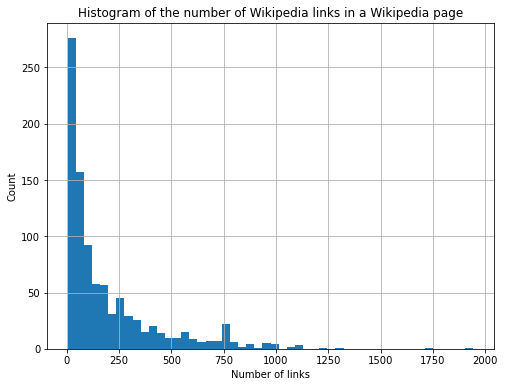

In [25]:
fig = plt.figure(figsize=(8,6))
num_links = df_subset['Links'].apply(len)
num_links.hist(bins=50)
plt.xlabel("Number of links")
plt.ylabel("Count")
plt.title("Histogram of the number of Wikipedia links in a Wikipedia page")

Text(0.5, 1.0, 'Histogram of the number of Wikipedia links in a Wikipedia page')

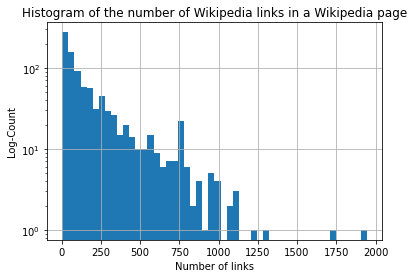

In [26]:
num_links.hist(bins=50)
plt.yscale('log')
plt.xlabel("Number of links")
plt.ylabel("Log-Count")
plt.title("Histogram of the number of Wikipedia links in a Wikipedia page")

From the first plot, we could already see that the number of links is right-skewed.

In [27]:
num_links.describe()

count     937.000000
mean      196.589114
std       242.796252
min         4.000000
25%        36.000000
50%        97.000000
75%       263.000000
max      1943.000000
Name: Links, dtype: float64

## Categories

In [28]:
categories = np.unique(df_subset['Category']).tolist()

In [29]:
print("Number of unique categories:", len(categories))

Number of unique categories: 23


In [17]:
levels = []

for level in range(depth):
    levels.append([x[level] for x in categories if len(x) == level+1])

In [18]:
with open(f"../data/categories_per_level_{depth}.json", "w+", encoding='utf-8') as f:
    json.dump(levels, f, ensure_ascii=False, indent=4)

FileNotFoundError: [Errno 2] No such file or directory: 'data/categories_per_level_12.json'

## Text

In [30]:
len_texts = df_subset['Text'].apply(len)

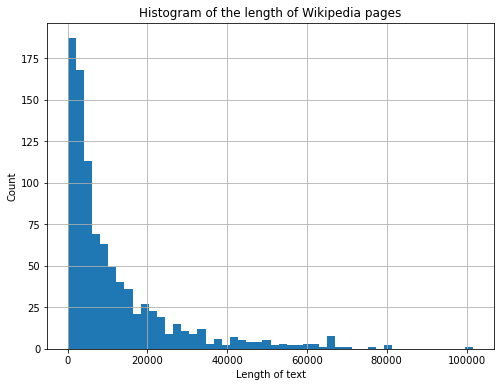

In [31]:
fig = plt.figure(figsize=(8,6))
len_texts.hist(bins=50)
plt.xlabel("Length of text")
plt.ylabel("Count")
plt.title("Histogram of the length of Wikipedia pages")
plt.show()

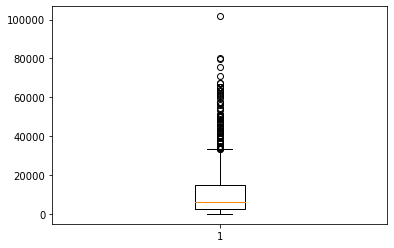

In [32]:
plt.boxplot(len_texts)
plt.show()